### Project 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from astropy import constants as const
from astropy import units as u
from celluloid import Camera

In [2]:
plt.rc('axes', labelsize = 14, titlesize = 20)
plt.rc('figure', titlesize = 20)

In [3]:
#G = 4 * np.pi**2 * (u.AU**3 / (u.M_sun * u.yr**2))

def c2p(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return (rho, phi)

def p2c(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return (x, y)

In [76]:
def df_2Body_Ast(vec, t, M1, M2, M3, G): #Astro units
    x1, y1, z1, vx1, vy1, vz1 = vec[0], vec[1], vec[2], vec[3], vec[4], vec[5]
    x2, y2, z2, vx2, vy2, vz2 = vec[6], vec[7], vec[8], vec[9], vec[10], vec[11]
    x3, y3, z3, vx3, vy3, vz3 = vec[12], vec[13], vec[14], vec[15], vec[16], vec[17]
    #
    x_12, y_12, z_12 = (x2 - x1), (y2 - y1), (z2 - z1)
    x_21, y_21, z_21 = (-x_12, -y_12, -z_12)
    x_23, y_23, z_23 = (x3 - x2), (y3 - y2), (z3 - z2)
    x_32, y_32, z_32 = (-x_23, -y_23, -z_23)
    x_13, y_13, z_13 = (x3 - x1), (y3 - y1), (z3 - z1)
    x_31, y_31, z_31 = (-x_13, -y_13, -z_13)
    #
    r_12 = np.sqrt(x_12**2 + y_12**2 + z_12**2)
    r_23 = np.sqrt(x_23**2 + y_23**2 + z_23**2)
    r_13 = np.sqrt(x_13**2 + y_13**2 + z_13**2)
    r_21, r_32, r_31 = r_12, r_23, r_13
    #
    dvec = np.zeros(len(vec))
    dvec[0], dvec[1], dvec[2] = vx1, vy1, vz1
    dvec[3] = (G * M2).value / r_12**3 * x_12 + (G * M3).value / r_13**3 * x_13
    dvec[4] = (G * M2).value / r_12**3 * y_12 + (G * M3).value / r_13**3 * y_13
    dvec[5] = (G * M2).value / r_12**3 * z_12 + (G * M3).value / r_13**3 * z_13
    
    dvec[6], dvec[7], dvec[8] = vx2, vy2, vz2
    dvec[9] = (G * M1).value / r_21**3 * x_21 + (G * M3).value / r_23**3 * x_23
    dvec[10] = (G * M1).value / r_21**3 * y_21 + (G * M3).value / r_23**3 * y_23
    dvec[11] = (G * M1).value / r_21**3 * z_21 + (G * M3).value / r_23**3 * z_23
    
    dvec[12], dvec[13], dvec[14] = vx3, vy3, vz3
    dvec[15] = (G * M1).value / r_31**3 * x_31 + (G * M2).value / r_32**3 * x_32
    dvec[16] = (G * M1).value / r_31**3 * y_31 + (G * M2).value / r_32**3 * y_32
    dvec[17] = (G * M1).value / r_31**3 * z_31 + (G * M2).value / r_32**3 * z_32
    return dvec

def df_3Body(vec, t, M1, M2, M3, G): #Natural Units
    x1, y1, z1, vx1, vy1, vz1 = vec[0], vec[1], vec[2], vec[3], vec[4], vec[5]
    x2, y2, z2, vx2, vy2, vz2 = vec[6], vec[7], vec[8], vec[9], vec[10], vec[11]
    x3, y3, z3, vx3, vy3, vz3 = vec[12], vec[13], vec[14], vec[15], vec[16], vec[17]
    #
    x_12, y_12, z_12 = (x2 - x1), (y2 - y1), (z2 - z1)
    x_21, y_21, z_21 = (-x_12, -y_12, -z_12)
    x_23, y_23, z_23 = (x3 - x2), (y3 - y2), (z3 - z2)
    x_32, y_32, z_32 = (-x_23, -y_23, -z_23)
    x_13, y_13, z_13 = (x3 - x1), (y3 - y1), (z3 - z1)
    x_31, y_31, z_31 = (-x_13, -y_13, -z_13)
    #
    r_12 = np.sqrt(x_12**2 + y_12**2 + z_12**2)
    r_23 = np.sqrt(x_23**2 + y_23**2 + z_23**2)
    r_13 = np.sqrt(x_13**2 + y_13**2 + z_13**2)
    r_21, r_32, r_31 = r_12, r_23, r_13
    #
    dvec = np.zeros(len(vec))
    dvec[0], dvec[1], dvec[2] = vx1, vy1, vz1
    dvec[3] = G * M2 / r_12**3 * x_12 + G * M3 / r_13**3 * x_13
    dvec[4] = G * M2 / r_12**3 * y_12 + G * M3 / r_13**3 * y_13
    dvec[5] = G * M2 / r_12**3 * z_12 + G * M3 / r_13**3 * z_13
    
    dvec[6], dvec[7], dvec[8] = vx2, vy2, vz2
    dvec[9] = G * M1 / r_21**3 * x_21 + G * M3 / r_23**3 * x_23
    dvec[10] = G * M1 / r_21**3 * y_21 + G * M3 / r_23**3 * y_23
    dvec[11] = G * M1 / r_21**3 * z_21 + G * M3 / r_23**3 * z_23
    
    dvec[12], dvec[13], dvec[14] = vx3, vy3, vz3
    dvec[15] = G * M1 / r_31**3 * x_31 + G * M2 / r_32**3 * x_32
    dvec[16] = G * M1 / r_31**3 * y_31 + G * M2 / r_32**3 * y_32
    dvec[17] = G * M1 / r_31**3 * z_31 + G * M2 / r_32**3 * z_32
    return dvec

def plot_orbits(vec):
    x1, y1, z1, vx1, vy1, vz1 = vec[:,0], vec[:,1], vec[:,2], vec[:,3], vec[:,4], vec[:,5] 
    x2, y2, z2, vx2, vy2, vz2 = vec[:,6], vec[:,7], vec[:,8], vec[:,9], vec[:,10], vec[:,11]
    x3, y3, z3, vx3, vy3, vz3 = vec[:,12], vec[:,13], vec[:,14], vec[:,15], vec[:,16], vec[:,17]

    plt.figure(figsize = (20, 10))
    plt.plot(x1, y1,'*', label = "Object 1")
    plt.plot(x2, y2,'*', label = "Object 2")
    plt.plot(x3, y3, label = "Orbit")
    #plt.ylim(-1, 1)
    plt.xlabel('x (AU)')
    plt.ylabel('y (AU)')
    plt.gca().set_aspect('equal')
    plt.legend(loc = 2), plt.grid()
    plt.show()
    return

def CoM(vec0, M1, M2, M3):
    mass = np.array([M1, M2, M3])
    radius = np.array([vec0[6*i:6*i+3] for i in range(3)])
    velocity = np.array([vec0[6*i+3:6*i+6] for i in range(3)]) 
    
    rCOM = np.dot(mass, radius) / np.sum(mass)
    vCOM = np.dot(mass, velocity) / np.sum(mass)
    
    rarr = radius - rCOM
    varr = velocity - vCOM
    
    vec0 = np.array([rarr[0], varr[0], rarr[1], varr[1], rarr[2], varr[2]]).flatten()
    return vec0

def rot_frame(vec):
    x1 = vec[:,0]
    y1 = vec[:,1]
    x2 = vec[:,6]
    y2 = vec[:,7]
    x3 = vec[:,12]
    y3 = vec[:,13]
    
    r1, p1 = c2p(x1, y1)
    r2, p2 = c2p(x2, y2)
    r3, p3 = c2p(x3, y3)
    
    p1, p3, p2 = (p1 - p2), (p3 - p2), 0
    
    x1, y1 = p2c(r1, p1)
    x2, y2 = p2c(r2, p2)
    x3, y3 = p2c(r3, p3)
    
    vec[:,0], vec[:,1] = x1, y1
    vec[:,6], vec[:,7] = x2, y2
    vec[:,12], vec[:,13] = x3, y3
    
    return vec

def anim_orbits(vec, name):
    x1, y1 = vec[:,0], vec[:,1]
    x2, y2 = vec[:,6], vec[:,7]
    x3, y3 = vec[:,12], vec[:,13]
    
    fig = plt.figure(figsize = (20, 10))
    camera = Camera(fig)

    plt.xlabel('x (AU)')
    plt.ylabel('y (AU)')
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal')
    plt.grid()

    for t_index in range(len(time)):
        #
        plt.plot(x1[t_index], y1[t_index], 'o', color='r')
        plt.plot(x2[t_index], y2[t_index], 'o', color='b')
        plt.plot(x3[t_index], y3[t_index], 'o', color='g')
        #
        plt.plot(x1[:t_index+1], y1[:t_index+1], color='r')
        plt.plot(x2[:t_index+1], y2[:t_index+1], color='b')
        plt.plot(x3[:t_index+1], y3[:t_index+1], color='g')
        plt.plot(0, 0, '*', color='black')
        camera.snap()
        
    animation = camera.animate()
    animation.save('{}.gif'.format(name), fps = 10, dpi = 300)

In [5]:
name = "figure_eight_new"
M1, M2, M3, G = np.ones(4)
   
i, j, k = (-1, 1, 0)
p1, p2 = (0.347111, 0.532728)
Period = 6.324449

vec0 = np.array([
        i, 0, 0, p1, p2, 0, 
        j, 0, 0, p1, p2, 0,
        k, 0, 0, -2*p1, -2*p2, 0
    ])
time = np.linspace(0, Period, 500)
vec = integrate.odeint(df_3Body, vec0, time, args=(M1, M2, M3, G))
#
#plot_orbits(vec)
#anim_orbits(vec, name)

In [6]:
name = "butterfly_I"
M1, M2, M3, G = np.ones(4)
   
i, j, k = (-1, 1, 0)
p1, p2 = (0.306893, 0.125507)
Period = 6.235641

vec0 = np.array([
        i, 0, 0, p1, p2, 0, 
        j, 0, 0, p1, p2, 0,
        k, 0, 0, -2*p1, -2*p2, 0
    ])

time = np.linspace(0, Period, 500)
vec = integrate.odeint(df_3Body, vec0, time, args=(M1, M2, M3, G))
#
#plot_orbits(vec)
#anim_orbits(vec, name)

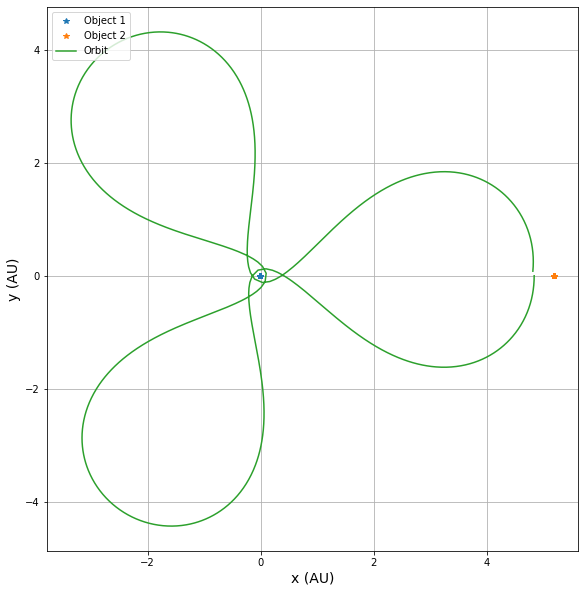

In [100]:
name = "Lagrange_Point_1"
M1, M2, M3 = 1, 1e-3, 0 # M1 is the the Sun, M2 is Jupiter
#M1, M2, M3 = 1, 3e-6, 0 # M1 is the the Sun, M2 is Earth
#M1, M2, M3 = 3e-6, 3e-8, 0 # M1 is the the Earth, M2 is Moon

M = M1 + M2 + M3
G = 4 * np.pi**2 #* (u.AU**3 / (u.M_sun * u.yr**2))

a, ecc = 5.2, 0 #Sun/Jupiter
#a, ecc = 1, 0 #Sun/Earth
#a, ecc = 0.0025, 0 #Earth/Moon

r = a * (1 - ecc**2) / (1 + ecc)
r1, r2 = (M2 / M) * r, (M1 / M) * r

l = np.sqrt(G * M * a * (1 - ecc**2))
v = l / r
v1, v2 = (M2 / M) * v, (M1 / M) * v

r3, v3 = a * (1 - np.cbrt(M2 / (3*M))), 0.2*v2 #L1

Period = np.sqrt(a**3 / M)

vec0 = np.array([
        r1, 0, 0, 0, v1, 0, 
        -r2, 0, 0, 0, -v2, 0,
        -r3, 0, 0, 0, -v3, 0
    ])

vecCM = CoM(vec0, M1, M2, M3)
time = np.linspace(0, Period, 2000)

vecCM = integrate.odeint(df_3Body, vecCM, time, args = (M1, M2, M3, G))

vecRT = rot_frame(vecCM)
#
plot_orbits(vecRT)
#anim_orbits(vecRT, name)

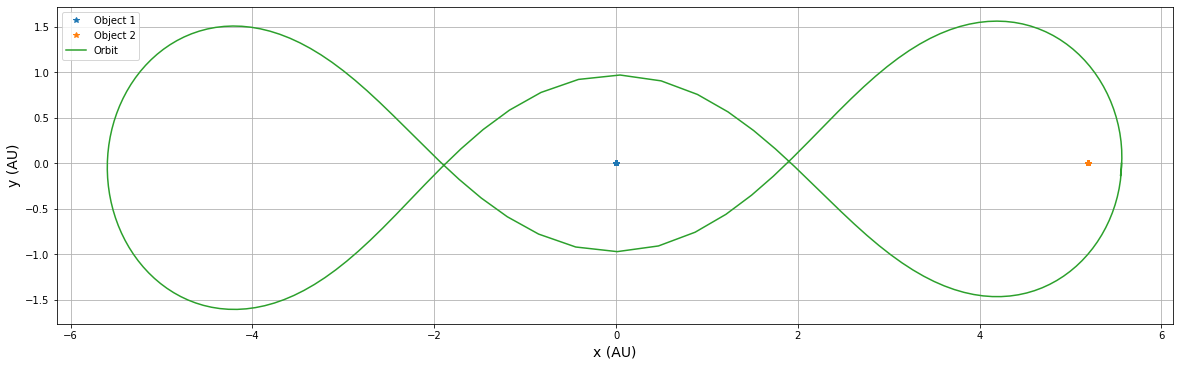

In [96]:
name = "Lagrange_Point_2"
M1, M2, M3 = 1, 1e-3, 0 # M1 is the the Sun, M2 is Jupiter
#M1, M2, M3 = 1, 3e-6, 0 # M1 is the the Sun, M2 is Earth
#M1, M2, M3 = 3e-6, 3e-8, 0 # M1 is the the Earth, M2 is Moon

M = M1 + M2 + M3
G = 4 * np.pi**2 #* (u.AU**3 / (u.M_sun * u.yr**2))

a, ecc = 5.2, 0 #Sun/Jupiter
#a, ecc = 1, 0 #Sun/Earth
#a, ecc = 0.0025, 0 #Earth/Moon

r = a * (1 - ecc**2) / (1 + ecc)
r1, r2 = (M2 / M) * r, (M1 / M) * r

l = np.sqrt(G * M * a * (1 - ecc**2))
v = l / r
v1, v2 = (M2 / M) * v, (M1 / M) * v

r3, v3 = a * (1 + np.cbrt(M2 / (3*M))), 0.5 * v2 #L2

Period = np.sqrt(a**3 / M)

vec0 = np.array([
        r1, 0, 0, 0, v1, 0, 
        -r2, 0, 0, 0, -v2, 0,
        -r3, 0, 0, 0, -v3, 0
    ])

vecCM = CoM(vec0, M1, M2, M3)
time = np.linspace(0, Period, 200)

vecCM = integrate.odeint(df_3Body, vecCM, time, args = (M1, M2, M3, G))

vecRT = rot_frame(vecCM)
#
plot_orbits(vecRT)
#anim_orbits(vecRT, name)